## Probability & Statistics
#### Descriptive Statistics & Correlation Analysis 
##### Lecture three BsIT Easter 2026

##### 1. Loading Relevant Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

#### 2. Loading the Dataset

In [2]:
df = pd.read_csv('Housing.csv')
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


- Basic inspection

In [3]:
df.shape
df.columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


#### 3. Extracting numerical columns

In [4]:
numerical_df = df.select_dtypes(include=['int64', 'float64'])
numerical_df.head()

,price,area,bedrooms,bathrooms,stories,parking
0,13300000,7420,4,2,3,2
1,12250000,8960,4,4,4,3
2,12250000,9960,3,2,2,2
3,12215000,7500,4,2,2,3
4,11410000,7420,4,1,2,2


#### 4. Measures of central tendency

In [5]:
# Mean
numerical_df.mean()

price        4.766729e+06
area         5.150541e+03
bedrooms     2.965138e+00
bathrooms    1.286239e+00
stories      1.805505e+00
parking      6.935780e-01
dtype: float64

In [6]:
# Median
numerical_df.median()

price        4340000.0
area            4600.0
bedrooms           3.0
bathrooms          1.0
stories            2.0
parking            0.0
dtype: float64

In [7]:
# Mode
numerical_df.mode()

,price,area,bedrooms,bathrooms,stories,parking
0,3500000,6000.0,3.0,1.0,2.0,0.0
1,4200000,NaN,NaN,NaN,NaN,NaN


- Distribution of Prices

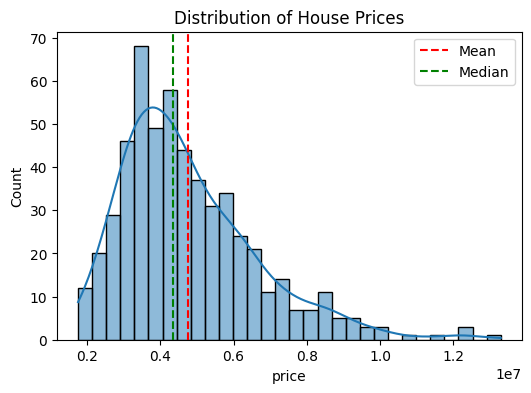

In [8]:
plt.figure(figsize=(6,4))
sns.histplot(numerical_df['price'], bins=30, kde=True)
plt.axvline(numerical_df['price'].mean(), color='red', linestyle='--', label='Mean')
plt.axvline(numerical_df['price'].median(), color='green', linestyle='--', label='Median')
plt.legend()
plt.title('Distribution of House Prices')
plt.show()

#### 5. Measures of Dispersion

In [9]:
# Range
numerical_df['price'].max() - numerical_df['price'].min()

11550000

In [10]:
# Variance
numerical_df.var()

price        3.498544e+12
area         4.709512e+06
bedrooms     5.447383e-01
bathrooms    2.524757e-01
stories      7.525432e-01
parking      7.423300e-01
dtype: float64

In [11]:
# Standard Deviation
numerical_df.std()

price        1.870440e+06
area         2.170141e+03
bedrooms     7.380639e-01
bathrooms    5.024696e-01
stories      8.674925e-01
parking      8.615858e-01
dtype: float64

In [12]:
# Interquartile Range (IQR)
Q1 = numerical_df['price'].quantile(0.25)
Q3 = numerical_df['price'].quantile(0.75)
Q3 - Q1

2310000.0

- Boxplot

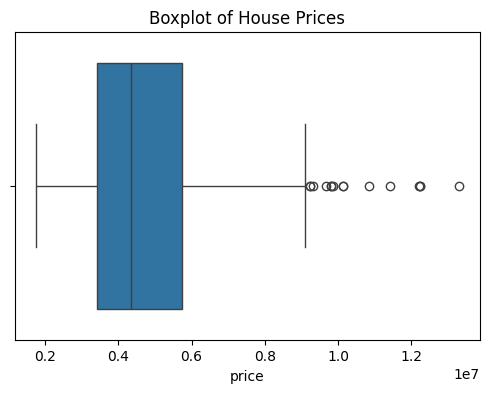

In [13]:
plt.figure(figsize=(6,4))
sns.boxplot(x=numerical_df['price'])
plt.title('Boxplot of House Prices')
plt.show()

#### 6. Correlation Analysis

In [14]:
correlation_matrix = numerical_df.corr()
correlation_matrix

,price,area,bedrooms,bathrooms,stories,parking
price,1.000000,0.535997,0.366494,0.517545,0.420712,0.384394
area,0.535997,1.000000,0.151858,0.193820,0.083996,0.352980
bedrooms,0.366494,0.151858,1.000000,0.373930,0.408564,0.139270
bathrooms,0.517545,0.193820,0.373930,1.000000,0.326165,0.177496
stories,0.420712,0.083996,0.408564,0.326165,1.000000,0.045547
parking,0.384394,0.352980,0.139270,0.177496,0.045547,1.000000


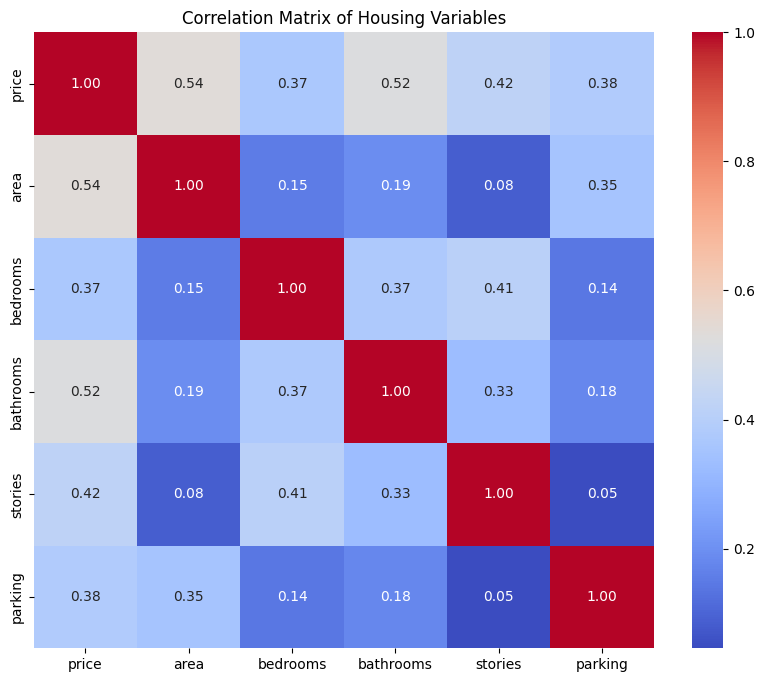

In [15]:
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Housing Variables')
plt.show()

- Scatter plot example

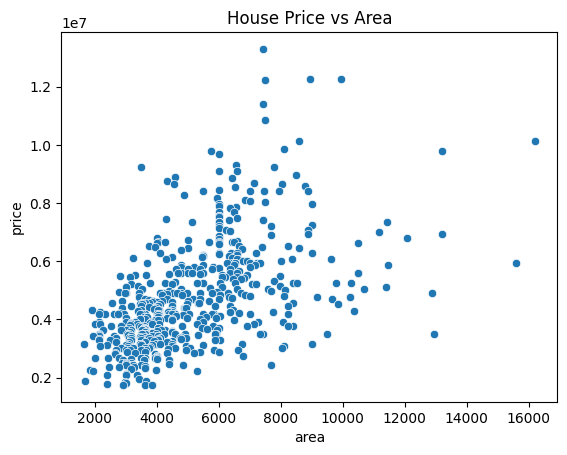

In [16]:
sns.scatterplot(x='area', y='price', data=numerical_df)
plt.title('House Price vs Area')
plt.show()

#### 7. Full statistical summary

In [17]:
numerical_df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000
